Лабораторна робота 1
---
**Основи роботи з OpenCV**
---

---

Мета роботи — ознайомитись з операціями читання, відображення та
збереження зображень з використанням пакету для мови програмування Python.

In [ ]:
!git clone https://github.com/nazarbeldyaga/ai-image-processing.git
%cd ai-image-processing
!pip install -r requirements.txt

Читання та відображення зображення

100%|██████████| 13.3M/13.3M [00:00<00:00, 83.0MB/s]

Extracting files...


Files in folder: ['waldo.jpg', 'Background_Subtraction_Tutorial_frame.mp4', 'Background-Subtraction-Tutorial_merged.mp4', 'data', 'WaldoBeach.jpg', 'minions.jpg', 'house.jpg', 'blobs.jpg', 'scan.jpg', 'hand.jpg', 'Origin_of_Species.jpg', 'Background_Subtraction_Tutorial_frame_1.png', 'Background_Subtraction_Tutorial_frame.png', 'Background-Subtraction-Tutorial_merged.gif', 'someshapes.jpg']


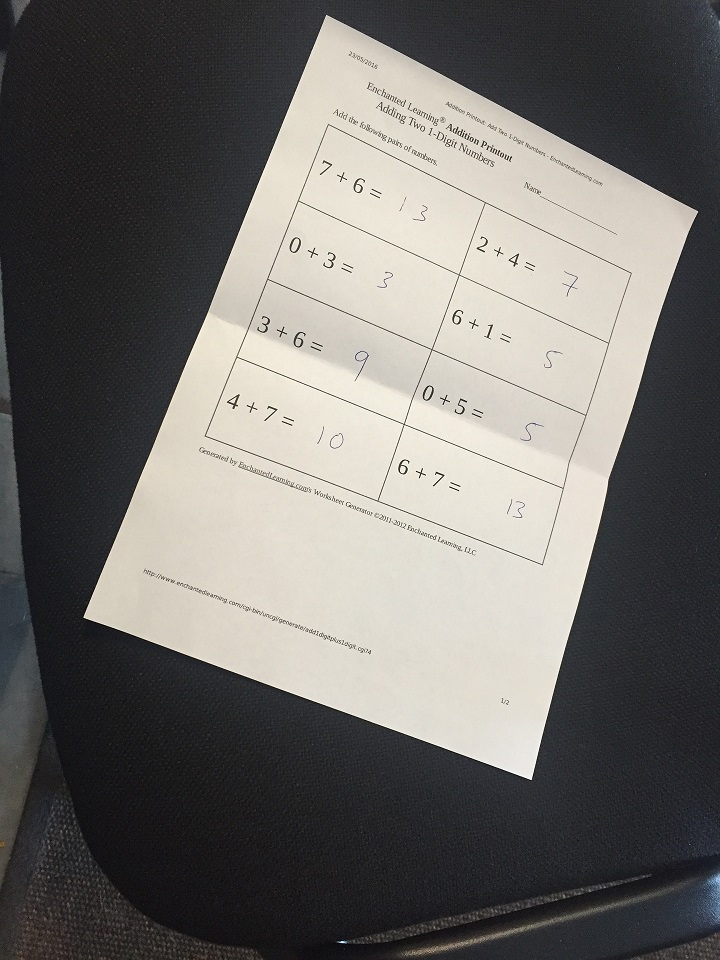

In [2]:
import kagglehub
import cv2
import os
from google.colab.patches import cv2_imshow

path = kagglehub.dataset_download("bulentsiyah/opencv-samples-images")

print("Files in folder:", os.listdir(path))
image_filename = "scan.jpg"
full_path = os.path.join(path, image_filename)

img = cv2.imread(full_path)

if img is not None:
    cv2_imshow(img)
else:
    print("No file:", full_path)

Збереження файлу

In [3]:
output_filename = "saved_image.jpg"
cv2.imwrite(output_filename, img)

True

Отримання доступу до окремих пікселів

In [32]:
(red, green, blue ) = img[100, 50]
print(f"{red = }, {green = }, {blue = }")

red = np.uint8(27), green = np.uint8(26), blue = np.uint8(28)


Вирізання зображення

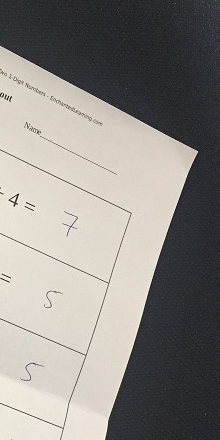

In [23]:
roi = img[60:500, 500:800]
cv2_imshow(roi)

Зміна розміру зображення

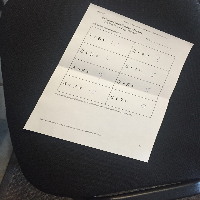

In [24]:
resized = cv2.resize(img, (200, 200))
cv2_imshow(resized)

Пропорційна зміна розміру

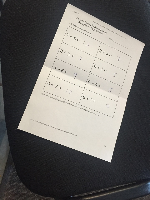

In [25]:
h, w = img.shape[0:2]
h_new = 200
ratio = w / h
w_new = int(h_new * ratio)
resized = cv2.resize(img, (w_new, h_new))
cv2_imshow(resized)

Пропорційна зміна за допомогою imutils

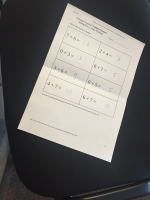

In [26]:
import imutils
resized = imutils.resize(img, height = 200)
cv2_imshow(resized)

Поворот зображення на 45 градусів

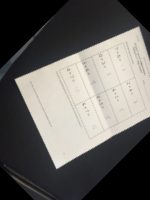

In [27]:
h, w = resized.shape[0:2]
center = (w // 2, h //2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated = cv2.warpAffine(resized, M, (w, h))
cv2_imshow(rotated)

Поворот зображення на 45 градусів за допомогою imutils

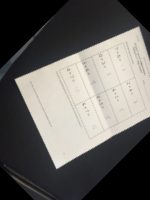

In [28]:
rotated = imutils.rotate(resized, -45)
cv2_imshow(rotated)

Розмиття зображення

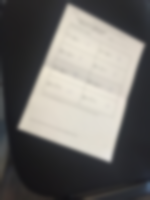

In [29]:
blurred = cv2.GaussianBlur(resized, (11, 11), 0)
cv2_imshow(blurred)

Склеїння зображень

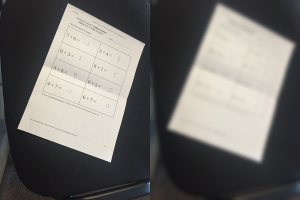

In [30]:
import numpy as np
summing = np.hstack((resized, blurred))
cv2_imshow(summing)

Малювання прямокутника

array([[[34, 30, 29],
        [41, 35, 33],
        [71, 66, 64],
        ...,
        [81, 76, 73],
        [64, 61, 61],
        [56, 51, 52]],

       [[31, 28, 28],
        [38, 34, 32],
        [63, 58, 57],
        ...,
        [81, 71, 68],
        [62, 54, 52],
        [52, 45, 44]],

       [[32, 28, 28],
        [35, 31, 30],
        [53, 47, 46],
        ...,
        [80, 72, 68],
        [81, 73, 69],
        [54, 45, 41]],

       ...,

       [[42, 45, 49],
        [45, 48, 52],
        [48, 51, 57],
        ...,
        [67, 70, 75],
        [55, 57, 61],
        [59, 60, 63]],

       [[44, 47, 51],
        [42, 46, 49],
        [47, 51, 56],
        ...,
        [64, 67, 71],
        [65, 66, 71],
        [59, 59, 64]],

       [[46, 49, 54],
        [46, 51, 54],
        [48, 52, 56],
        ...,
        [57, 60, 65],
        [62, 63, 69],
        [63, 63, 71]]], dtype=uint8)
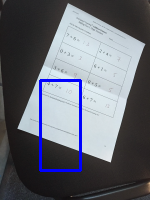

In [31]:
cv2.rectangle(resized, (80, 170), (40, 80), (0, 0, 255), 2)

Малювання лінії

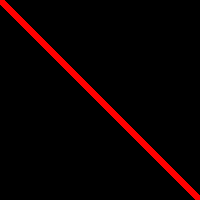

In [34]:
img = np.zeros((200, 200, 3), np.uint8)
cv2.line(img, (0, 0), (200, 200), (0, 0, 255), 5)
cv2_imshow(img)

Малювання за набором точок

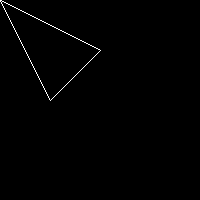

In [36]:
img = np.zeros((200, 200, 3), np.uint8)
points = np.array([[0, 0], [100, 50], [50, 100], [0, 0]])
cv2.polylines(img, np.int32([points]), 1, (255, 255, 255))
cv2_imshow(img)

Малювання кола

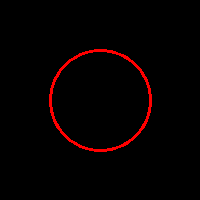

In [37]:
img = np.zeros((200, 200, 3), np.uint8)
cv2.circle(img, (100, 100), 50, (0, 0, 255), 2)
cv2_imshow(img)

Розміщення тексту на зображенні

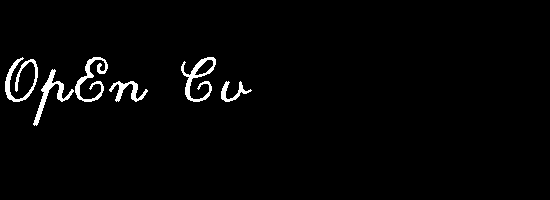

In [46]:
img = np.zeros((200, 550, 3), np.uint8)
font = cv2.FONT_HERSHEY_SCRIPT_COMPLEX
cv2.putText(img, "OpEn Cv", (0, 100), font, 2.0, (255, 255, 255), 2, cv2.LINE_4)
cv2_imshow(img)

Відповіді на контрольні запитання:

1.Що таке OpenCV?

OpenCV — бібліотека функцій та алгоритмів комп'ютерного зору,
обробки зображень і чисельних алгоритмів загального призначення з відкритим
кодом.

2.Що таке піксель?

Піксель — це найменша одиниця цифрового растрового зображення або екрана, що має вигляд квадратика. Кожен піксель зображення у форматі градації сірого має
значення, що відображає відтінок сірого, тобто лише інтенсивністъ. У OpenCV кольорові зображення в RGB колірному просторі мають 3-кортеж, пов'язаний з кожним пікселем: (B, G, R).

3.Як встановити пакет opencv-python?

Встановити цей модуль можна за допомогою пакетного менеджера pip, uv чи conda.

4.Як розмити зображення?

Використати функцію opencv під назвою GaussianBlur, в яку передати наше зображення а також розмір ядра для розмивання.

5.Які функції використовуються для малювання та відображення тексту?

Line() для ліній, rectangle() для прямокутників, circle() для кіл. Для відображення тексту - putText() з передачею необхідних аргументів, таких як точка вставки тексту, шрифт, товщина, стиль лінії, колір тощо.



---

Виконали студенти ІП-31 Бельдяга Назар та ІА-31 Підковка Дмитро